<a href="https://colab.research.google.com/github/FranciscoAguiar/DataScienceProgramming/blob/master/ProcessingTwitters_UEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
!tar -xvf dados-curso-completo.csv.tar.gz

--2020-10-05 00:42:48--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‚Äòdados-curso-completo.csv.tar.gz.3‚Äô

dados-curso-complet 100%[===================>] 136.70M  60.7MB/s    in 2.3s    

2020-10-05 00:42:51 (60.7 MB/s) - ‚Äòdados-curso-completo.csv.tar.gz.3‚Äô saved [143340808/143340808]

dados-curso-completo.csv


In [197]:
!pip install matplotlib
!pip install geopandas
!python -m spacy download pt

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 972kB 2.7MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10.9MB 7.4MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 14.8MB 44.5MB/s 
‚úî Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
‚úî Linking successful
/usr/local/lib/python3.6/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point
from geopandas import GeoDataFrame

In [199]:
tweets_df = pd.read_csv('dados-curso-completo.csv')
tweets_df.head()

data              usuario  ... longitude hashtags
0  2020-03-23 18:51:14             Gaboardi  ...       NaN       []
1  2020-03-18 03:18:14   Seu Z√© da Farm√°cia  ...       NaN       []
2  2020-03-29 12:09:27  Mar√≠lia Oliveira üáßüá∑  ...       NaN       []
3  2020-04-01 21:11:07                    üö©  ...       NaN       []
4  2020-03-19 17:49:40       Nova Impress√£o  ... -15.77691       []

[5 rows x 13 columns]

In [200]:
total_records = len(tweets_df.index)
print('Total records:', total_records)

print('Number of records without date:', tweets_df.data.isnull().sum())
print('Number of records without text:', tweets_df.texto.isnull().sum())

no_city_count = tweets_df.lugar.isnull().sum()
no_city_percentage = tweets_df.lugar.isnull().mean() * 100
print('Number of records without city:', no_city_count)
print('Percentage of records without city:', no_city_percentage)

print(tweets_df['pais'].isnull().sum())
print(tweets_df['pais'].isna().sum())
print('lat', tweets_df['latitude'].isna().sum())
print('lat', tweets_df['latitude'].isnull().sum())
print(tweets_df['longitude'].isna().sum())
tweets_df.info()
tweets_df.count()

Total records: 1658825
Number of records without date: 0
Number of records without text: 0
Number of records without city: 1584220
Percentage of records without city: 95.50253944810333
1584225
1584225
lat 1650105
lat 1650105
1650105
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: f

data          1658825
usuario       1658768
apelido       1658825
texto         1658825
retweet       1658825
seguidores    1658825
idioma        1658825
lugar           74605
pais            74600
sigla           74595
latitude         8720
longitude        8720
hashtags      1658825
dtype: int64

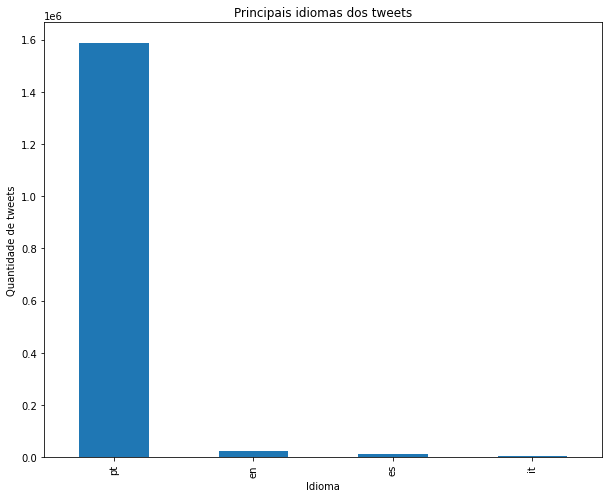

In [242]:
tweets_df.groupby('idioma').idioma.count().sort_values(ascending = False)[:4].plot(kind = 'bar', figsize = (10, 8))
plt.title('Principais idiomas dos tweets')
plt.xlabel('Idioma')
plt.ylabel('Quantidade de tweets')
plt.show()

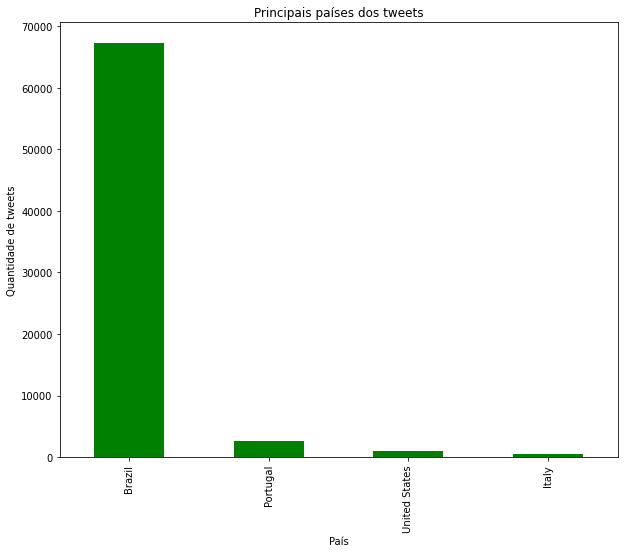

In [243]:
tweets_df.groupby('pais').pais.count().sort_values(ascending = False)[:4].plot(kind = 'bar', figsize = (10, 8), color = 'g')
plt.title('Principais pa√≠ses dos tweets')
plt.xlabel('Pa√≠s')
plt.ylabel('Quantidade de tweets')
plt.show()

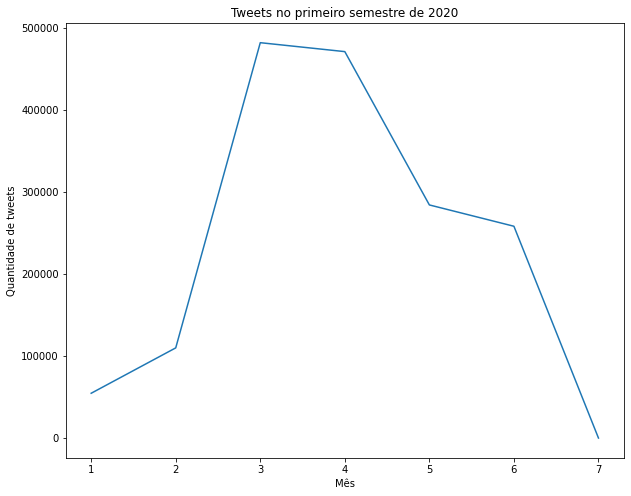

In [244]:
tweets_df.data = tweets_df.data.astype("datetime64")
tweets_df.groupby(tweets_df.data.dt.month).texto.count().plot(kind="line", figsize = (10, 8))
plt.title('Tweets no primeiro semestre de 2020')
plt.xlabel('M√™s')
plt.ylabel('Quantidade de tweets')
plt.show()

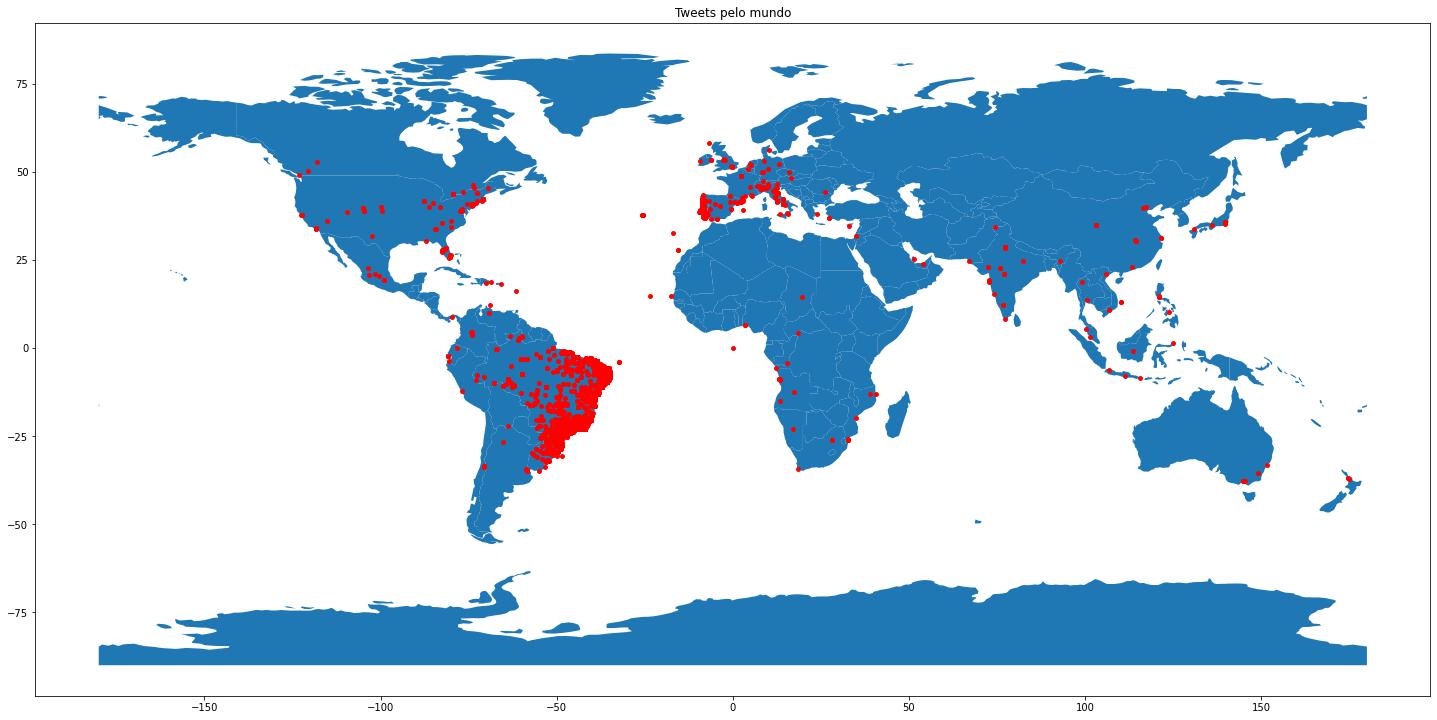

In [270]:
geometry = [Point(xy) for xy in zip(tweets_df.loc[tweets_df.latitude.notnull()].latitude, tweets_df.loc[tweets_df.longitude.notnull()].longitude)]
location_dic = {'tweet': tweets_df.loc[tweets_df.latitude.notnull()].texto, 'geometry': geometry}
gdf = GeoDataFrame(location_dic, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(25, 20)), marker='o', color='red', markersize=15)
plt.title('Tweets pelo mundo')
plt.show()

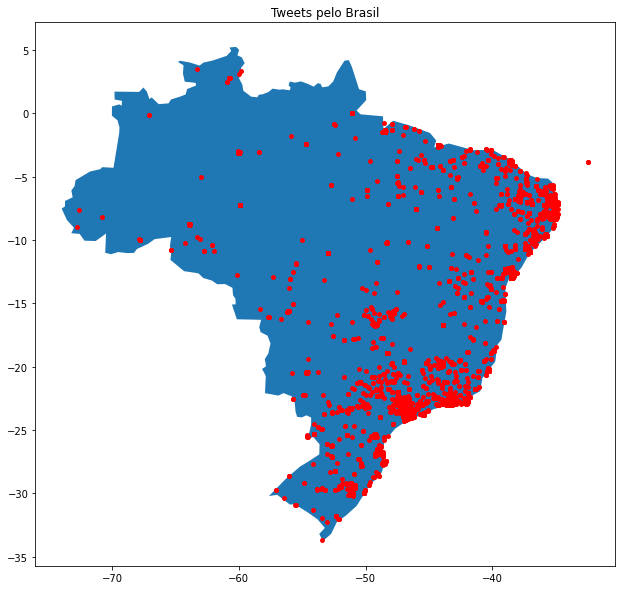

In [271]:
country = 'Brazil'
latitudes = tweets_df.loc[(tweets_df.latitude.notnull()) & (tweets_df.pais == country)].latitude
longitudes = tweets_df.loc[(tweets_df.longitude.notnull()) & (tweets_df.pais == country)].longitude
localized_tweets = tweets_df.loc[(tweets_df.latitude.notnull()) & (tweets_df.pais == country)].texto
geometry = [Point(xy) for xy in zip(latitudes, longitudes)]
location_dic = {'tweet': localized_tweets, 'geometry': geometry}
brazil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).loc[world.name == country]

gdf = GeoDataFrame(location_dic, geometry=geometry)
gdf.plot(ax=brazil.plot(figsize=(15, 10)), marker='o', color='red', markersize=15)
plt.title('Tweets pelo Brasil')
plt.show()

In [234]:
#como 
import spacy

# Load Portuguese tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load('pt')
count = 0
df = pd.DataFrame()
for row in tweets_df.itertuples():
    #print(row.texto)
    twitter = row.texto
    if (twitter.find("?")>=0) :
      count +=1    
        
print(count)

  #
# Process whole documents
text = ("Caro amigo, A Fuma√ßa de cigarro pode propagar coronav√≠rus?")
doc = nlp(text)

# Analyze syntax
#print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
#print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])
#print("Split:", doc.text.split())
#print("Split mais coerente: ",[token for token in doc])
#print("String ao inves de token", [token.orth_ for token in doc])
#print("pontua√ß√£o: ",[token.orth_ for token in doc if token.is_punct])

#if ("?" in [token.orth_ for token in doc if token.is_punct]):
#  print('pergunta')
   
#print( "Classificacao: ", [(token.orth_, token.pos_) for token in doc])
#sentences = [i for i in nlp(text).sents]



#print("sentences:", sentences)

# Find named entities, phrases and concepts
#for entity in doc.ents:
#    print(entity.text, entity.label_)

172501


# Vis√£o geral dos dados



1. Devem apresentar um resumo (sum√°rio) com as estat√≠sticas dos dados originais, ou seja, sem
qualquer pr√©-processamento. A apresenta√ß√£o deste tipo de informa√ß√£o relevante para que outras pessoas possam ter uma vis√£o geral dos dados. As estat√≠sticas podem ser apresentadas
atrav√©s de tabelas e/ou gr√°ficos.

Total de Registros | Total de Twitters | Total de Cidades | Total de HashTags 
--- | --- | --- | ---
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3 | Row 1, Col 4


---

Total de Registros Nulos | Total de  | Total de  | Total de  
--- | --- | --- | ---
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3 | Row 1, Col 4


---

Inserir Gr√°fico

2. As mensagens foram pr√©-processadas para que as perguntas (quest√µes) fossem identificadas.
Essa cole√ß√£o de perguntas corresponde ao dataset ‚ÄúDuvidasDB‚Äù. A seguir, a equipe deve
apresentar as estat√≠sticas sobre esses dados.

Total de Perguntas Selecioandas | Total de  | Total de  
--- | --- | --- 
Row 1, Col 1 | Row 1, Col 2 | Row 1, Col 3

Inserir Gr√°fico


# Temas Discutidos

As equipes devem fazer uma an√°lise sobre os temas que s√£o debatidos nas perguntas dos
postadas pelos usu√°rios. Fa√ßa uma an√°lise se as perguntas s√£o relativas aos seguintes temas:



1.   Doen√ßa. Quando a pergunta √© relativa √† doen√ßa. Deve-se observar que a doen√ßa √© identificada por v√°rios nomes. Exemplo: coronav√≠rus, corona, COVID-19, etc.
2.   Medicamento. Quando a pergunta √© sobre o uso de determinado medicamento no tratamento
da doen√ßa.
3.   Organiza√ß√µes. Quando a pergunta √© relativa a uma determinada entidade ou organiza√ß√£o.
Emissora de TV, Minist√©rio da Sa√∫de ou empresas, s√£o exemplos de organiza√ß√µes.
4.   Pessoas. Quando a pergunta √© sobre determinada pessoa. Por exemplo, a pergunta pode
ser sobre a atua√ß√£o que determinado pol√≠tico ou pessoa famosa teve durante esse per√≠odo de
pandemia.





# Vis√£o Temporal

Deve-se fazer uma an√°lise temporal das perguntas que formam o dataset DuvidasDB. Pode-se considerar o intervalo temporal de dias, semanas ou meses. A escolha do intervalo de tempo ficar√° a cargo das equipes. Exemplos de an√°lise temporal: a) houve um aumento no n√∫mero de perguntas ao longo do tempo? b) houve uma mudan√ßa no perfil das perguntas ao longo do tempo?

# Vis√£o Geogr√°fica

Deve-se fazer uma an√°lise geogr√°fica (espacial) das perguntas que formam o dataset DuvidasDB.
Existem algumas colunas no dataset que trazem a informa√ß√£o das localiza√ß√µes como, por exemplo,
o pa√≠s, estado e cidade. Em alguns tu√≠tes √© poss√≠vel ainda identificar as coordenadas geogr√°ficas de latitude e longitude. Exemplo de an√°lise geogr√°fica: a) os usu√°rios de regi√µes diferentes fazem perguntas com diferentes focos? Por exemplo, ser√° que os usu√°rios de uma regi√£o perguntam mais sobre a doen√ßa ou sobre o tratamento? Essa an√°lise ainda pode ser realizada em diversos n√≠veis de
√°rea (cidade, estado ou regi√£o). Al√©m de apresentar a distribui√ß√£o das d√∫vidas dos usu√°rios por regi√£o, a equipe dever√° fazer uma an√°lise dessa distribui√ß√£o. Por exemplo, apresentar as raz√µes(ou hip√≥teses) da ocorr√™ncia dessa distribui√ß√£o.